In [11]:
import models
from models import combine_bench_prior, load_priorband_data,add_rel_ranks,rename_algos,create_incumbent, model, create_cd_cluster
import pandas as pd
import numpy as np

algorithm="algorithm";benchmark="bench_prior";seed="seed";time="used_fidelity"
algos=["pb_mutation_dynamic_geometric-default-at-target","random_search","hyperband"]
#fs=[24]
#f_space=np.linspace(1,max(fs),max(fs)).tolist()
benchmarks=["jahs_cifar10","jahs_colorectal_histology","jahs_fashion_mnist","lcbench-126026","lcbench-167190","lcbench-168330","lcbench-168910","lcbench-189906","cifar100_wideresnet_2048","imagenet_resnet_512","lm1b_transformer_2048","translatewmt_xformer_64"]
label_dict={'random_search': 'RS', 'hyperband': 'HB', 'pb_mutation_dynamic_geometric-default-at-target': 'PB', 'jahs_cifar10': 'JAHS-C10', 'jahs_colorectal_histology': 'JAHS-CH', 'jahs_fashion_mnist': 'JAHS-FM', 'lcbench-126026': 'LC-126026', 'lcbench-167190': 'LC-167190', 'lcbench-168330': 'LC-168330', 'lcbench-168910': 'LC-168910', 'lcbench-189906': 'LC-189906', 'cifar100_wideresnet_2048': 'PD1-Cifar100', 'imagenet_resnet_512': 'PD1-ImageNet', 'lm1b_transformer_2048': 'PD1-LM1B', 'translatewmt_xformer_64': 'PD1-WMT',"random_search_prior":"RS+Prior","bo":"BO","pibo":"PiBO","bohb":"BOHB","priorband_bo":"PB+BO"}

data=pd.read_parquet("priorband_benchPrior_relRanks_f24_meta.parquet")
# data=pd.read_parquet("pibo_benchPrior_relRanks_f24_meta.parquet")

In [ ]:
# data_s=data.loc[data["seed"]==0]
# combos=data_s.groupby([benchmark, algorithm]).size().reset_index(name='count')
# print(combos[benchmark].value_counts())

In [13]:
loss="value"
p_data=data.loc[data["seed"].isin(np.linspace(0,10,1))].loc[data["bench_prior"].str.contains("bad")]
p_data=p_data.loc[~(data[benchmark].str.contains("former"))&~(data[benchmark].str.contains("net"))]

result_cluster={}
fs=[1,5,10,15,20,24]
for f in fs:
    result_cluster[f]={}
    f_data=p_data.loc[p_data[time]==f]
    result_cluster[f]["m0'"]=model(formula=f"{loss}~{algorithm}",data=f_data).post_hoc(marginal_vars=algorithm)
    result_cluster[f]["m0"]=model(formula=f"{loss}~{algorithm}+(1|{benchmark})",data=f_data).post_hoc(marginal_vars=algorithm)
    result_cluster[f]["m1"]=model(formula=f"{loss}~{algorithm}+{benchmark}",data=f_data).post_hoc(marginal_vars=algorithm)
    result_cluster[f]["m2"]=model(formula=f"{loss}~{algorithm}+{benchmark}+{algorithm}:{benchmark}",data=f_data).post_hoc(marginal_vars=algorithm)
    result_cluster[f]["m4"]=model(formula=f"{loss}~{algorithm}:{benchmark}+{time}",data=f_data).post_hoc(marginal_vars=algorithm)
    result_cluster[f]["m4'"]=model(formula=f"{loss}~{algorithm}:{benchmark}+{time}+({algorithm}:{benchmark}):{time}",data=f_data).post_hoc(marginal_vars=algorithm)



boundary (singular) fit: see help('isSingular') 

P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
boundary (singular) fit: see help('isSingular') 

P-values adjusted by tukey method for family of 3 estimates
boundary (singular) fit: see help('isSingular') 

P-values adjusted by tukey method for family of 3 estimates
[1] "Model failed to converge with max|grad| = 2.59027 (tol = 0.002, component 1)"
[2] " \n"                                                                         

[1] "Model is nearly unidentifiable: very large eigenvalue\n - Rescale variables?"
[2] " \n"                                                                         

P-values adjusted by tukey method for family of 3 estimates
[1] "Model failed to converge with max|grad| = 2.59027 (tol = 0.002, component 1)"
[2] " \n"                                                                         

[1] "Model is nearly unidentifiable: very large e

In [14]:
for f in result_cluster.keys():
    for m in result_cluster[f]:
        print(f"Fidelity: {f}, Model: {m}")
        print(result_cluster[f][m])

Fidelity: 1, Model: m0'
(  algorithm  Estimate  2.5_ci  97.5_ci     SE    DF
1        PB    36.152  15.912   56.391  9.806  24.0
2        RS     3.542 -16.697   23.782  9.806  24.0
3        HB     9.970 -10.269   30.210  9.806  24.0,   Contrast  Estimate  2.5_ci  97.5_ci      SE    DF  T-stat  P-val Sig
1  PB - RS    32.609  -2.024   67.243  13.868  24.0   2.351  0.068   .
2  PB - HB    26.181  -8.452   60.815  13.868  24.0   1.888  0.164    
3  RS - HB    -6.428 -41.061   28.205  13.868  24.0  -0.464  0.889    )
Fidelity: 1, Model: m0
(  algorithm  Estimate  2.5_ci  97.5_ci     SE      DF
1        PB    36.152  15.646   56.658  9.806  19.264
2        RS     3.542 -16.964   24.048  9.806  19.264
3        HB     9.970 -10.536   30.476  9.806  19.264,   Contrast  Estimate  2.5_ci  97.5_ci      SE    DF  T-stat  P-val Sig
1  PB - RS    32.609   3.772   61.447  11.176  16.0   2.918  0.026   *
2  PB - HB    26.181  -2.656   55.019  11.176  16.0   2.343  0.078   .
3  RS - HB    -6.428 -35.26

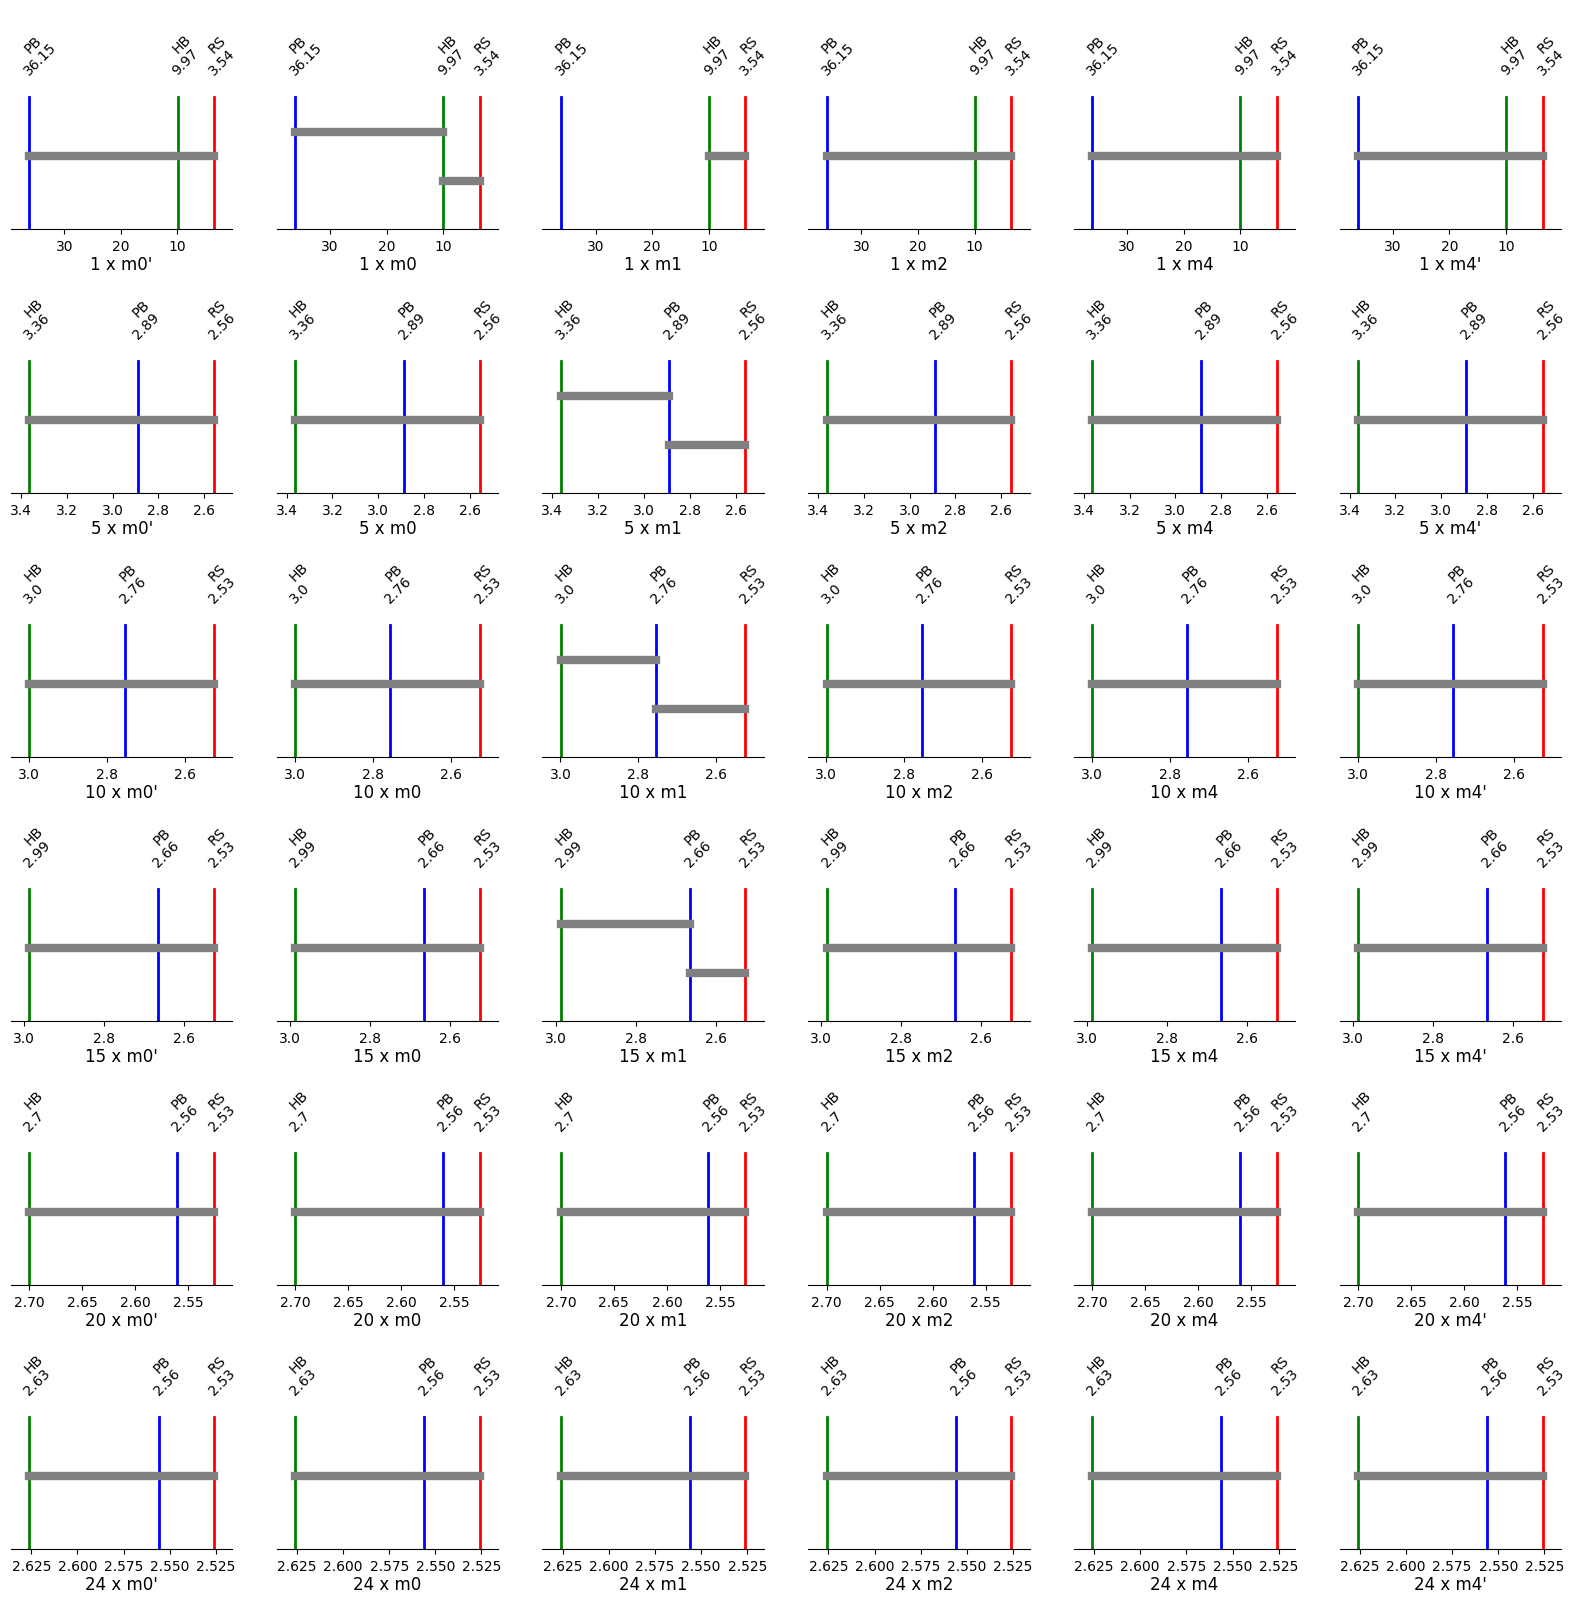

In [15]:
create_cd_cluster(result_cluster)